<a href="https://colab.research.google.com/github/vineelasowjanya/my-first-project/blob/main/youtube_adview_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Youtube Adview Prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

Importing Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
path=""#
data_train= pd.read_csv(path + "train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

assigning values to the categories

In [ ]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [ ]:
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']


Encoding duration,vidid and published

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


convert Time in sec for duration

In [ ]:
import datetime
import time
def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  P=["H","M","S"]
  for i in y:
    if i not in P:
      mm+=i
    else:
      if (i=="H"):
        h=mm
        mm=''
      elif (i=="M"):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if (h==''):
    h='00'
  if (m==''):
    m='00'
  if (s==''):
    s='00'
  bp=h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp=pd.read_csv(path+"train.csv")["duration"]
time=mp.apply(checki)

def func_sec(time_string):
  h,m,s=time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


Data Visualization

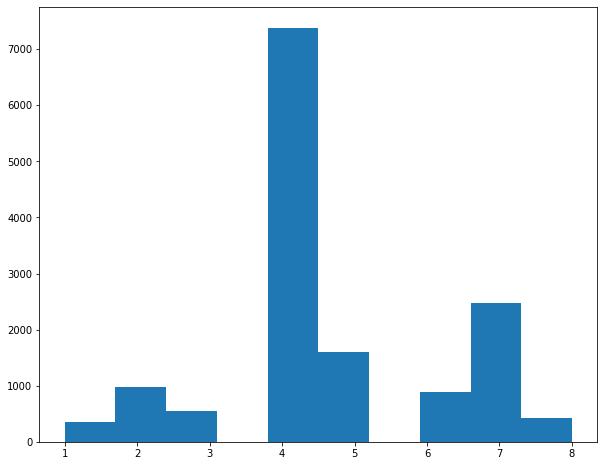

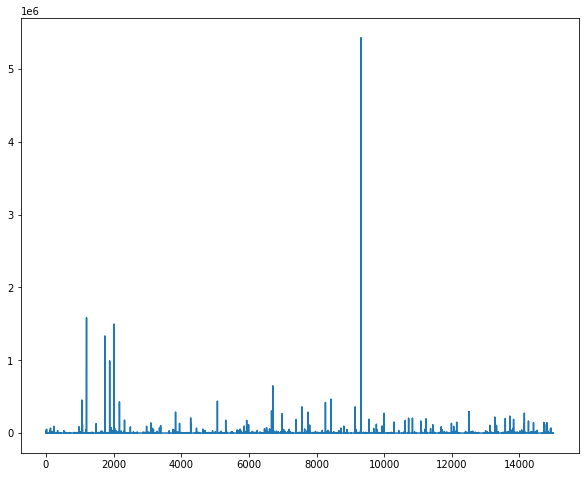

In [ ]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

Heat map

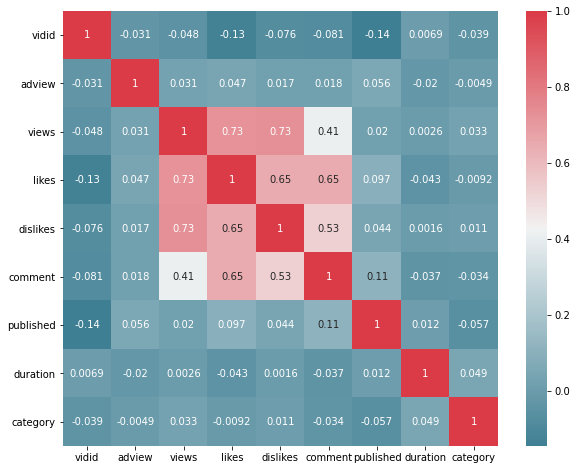

In [ ]:
data_train=data_train[data_train["adview"]<2000000]

f,ax=plt.subplots(figsize=(10,8))
corr=data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

Dividing the data

In [ ]:
Y_train=pd.DataFrame(data_train.iloc[:,1].values, columns =['target'])
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_train,Y_train,test_size=0.2,random_state=42)

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [ ]:
X_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
13440,1675,39,86739,117,9,4,1217,180,4
9523,7060,4,1419766,887,362,232,1547,5811,7
3012,6074,18782,26086,19,0,9,966,178,6
1888,7342,2,305445,3662,45,555,1484,257,7
11378,10620,20,737649,1702,96,53,1127,895,4
...,...,...,...,...,...,...,...,...,...
5316,8897,21127,31648,140,24,14,1925,231,7
13748,14166,1,1804,4,1,0,1049,232,4
5522,2267,1,204817,86,35,11,1237,218,4
883,6599,2,1361366,1384,757,185,2145,240,7


In [ ]:
X_train.describe()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,11708.000000,1.170800e+04,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,7293.367954,1.694426e+03,6.974161e+05,2771.122139,251.030577,418.178767,1551.810215,1048.108985,4.611548
std,4230.863849,2.765144e+04,2.582877e+06,8734.608422,965.881840,1556.703705,579.565587,2379.930309,1.579242
min,1.000000,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3606.750000,1.000000e+00,3.133975e+04,86.000000,7.000000,7.000000,1144.000000,188.000000,4.000000
50%,7282.500000,2.000000e+00,1.609395e+05,461.000000,39.000000,46.000000,1704.000000,327.000000,4.000000
75%,10969.250000,6.000000e+00,5.842132e+05,1897.000000,170.000000,232.000000,2065.000000,726.000000,6.000000
max,14636.000000,1.583846e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()


0.1907466322954143

Metrics Evaluation

In [ ]:
from sklearn import metrics
def print_error(X_test,y_test,model_name):
  prediction=model_name.predict(X_test)
  print('mean absolute error:',metrics.mean_absolute_error(y_test,prediction))
  print('mean squared error:',metrics.mean_squared_error(y_test,prediction))
  print('root mean squared error:',np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

Linear Regression

In [ ]:
from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)

linear_regression.predict(X_test)

array([[ 5.75049583],
       [ 2.18762396],
       [ 5.75049583],
       ...,
       [ 1.        ],
       [ 2.18762396],
       [12.87623957]])

In [ ]:
print_error(X_test,y_test,linear_regression)

mean absolute error: 318.4444410623552
mean squared error: 29348199.86051378
root mean squared error: 17.845011657669357


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)


mean absolute error: 277.9535519125683
mean squared error: 16791739.152322404
root mean squared error: 16.67193905676746


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print_error(X_test,y_test,random_forest)

mean absolute error: 312.2765288655921
mean squared error: 36451756.145956814
root mean squared error: 17.671347681079453


Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
supportvector_regressor=SVR()
print_error(X_test,y_test,linear_regression)

mean absolute error: 318.4444410623552
mean squared error: 29348199.86051378
root mean squared error: 17.845011657669357


Artificial Neural Network

In [ ]:
import keras
from keras.layers import Dense

ann=keras.models.Sequential([
                             Dense(6,activation="relu",
                             input_shape=X_train.shape[1:]),
                             Dense(6,activation="relu"),
                             Dense(1)
                             ])

In [ ]:
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

Epoch 1/100
366/366 [==============================] - 0s 789us/step - loss: 767404928.0000 - mean_squared_error: 767404928.0000
Epoch 2/100
366/366 [==============================] - 0s 792us/step - loss: 767395776.0000 - mean_squared_error: 767395776.0000
Epoch 3/100
366/366 [==============================] - 0s 818us/step - loss: 767374720.0000 - mean_squared_error: 767374720.0000
Epoch 4/100
366/366 [==============================] - 0s 794us/step - loss: 767327104.0000 - mean_squared_error: 767327104.0000
Epoch 5/100
366/366 [==============================] - 0s 802us/step - loss: 767247936.0000 - mean_squared_error: 767247936.0000
Epoch 6/100
366/366 [==============================] - 0s 779us/step - loss: 767143936.0000 - mean_squared_error: 767143936.0000
Epoch 7/100
366/366 [==============================] - 0s 852us/step - loss: 767016768.0000 - mean_squared_error: 767016768.0000
Epoch 8/100
366/366 [==============================] - 0s 794us/step - loss: 766855680.0000 - mea

In [ ]:
print_error(X_test,y_test,ann)

mean absolute error: 3301.8790457092346
mean squared error: 827158519.8246633
root mean squared error: 57.46197913150255
